In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
rings = "analysis/tot_rings.dat"
clusters = "Clusters/plottami.dat"

for alcool in ["1BO"]:
    path = f"/home/riccardo/Mixtures/Jobs/{alcool}"
    dic1 = [x for x in os.listdir(path)]

    dic2 = {}
    for value in dic1:
        with open(f"{path}/{value}/{clusters}", "r") as rg:
                items = rg.read().splitlines()
                items = list(map(int,items))
        dic2[value] = items

    rings_to_count = {x:[] for x in range(3,9)}    
     

    for mix in sorted (dic2.keys()):
   
        for n,r in rings_to_count.items():
            n_mol = 400-400*float(mix)
            counter = dic2[mix].count(n)/n_mol*n
            #print(f"We have {counter}% molecules in {n} m-rings on the mixture {mix}DBE")
            rings_to_count[n].append(counter)
        
    xax = np.array([0.00,0.125,0.25,0.375,0.50,0.625,0.75,0.88,0.94])
    for x in rings_to_count.keys():
        while x < 6:
            plt.plot(xax,rings_to_count[x], label = f"{x}m-cluster", marker = "o")
            plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.01),ncol=3, fancybox=True, shadow=True)
        
        plt.xlim(0,1)
        plt.ylim(0,24.5)
        
        plt.title(f"Fraction of {alcool} Molecules in Different Clusters")
        plt.xlabel("x$_{DBE}$")
        plt.ylabel(f"{alcool} molecules in Clusters (%)")
        plt.savefig(f"/home/riccardo/Mixtures/Figures/Clust_An/{alcool}_faction_Clusters.svg", format='svg', dpi=1200)

##### 

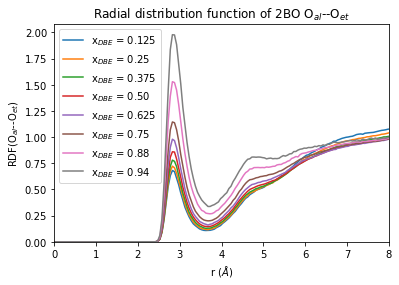

In [5]:
import os 
import numpy as np
import matplotlib.pyplot as plt


for alcool in ["2BO"]:
    path1 = f"/home/riccardo/Mixtures/Jobs/{alcool}"
    
    dicter = {b:[] for b in os.listdir(path1)}
    
    for f in os.listdir(path1):
        dicter[f] = np.loadtxt(f"{path1}/{f}/rdf_OaOe.dat")
    
    cacca = ("a","b","c","d","e","g","h","i","l")
    dicter2 = {x:m for x in os.listdir(path1) for m in cacca}

    del dicter["0.00"]    
    for f,s in sorted (dicter.items()):
        dicter[f] = s
        plt.plot(s[:,0],s[:,1], label = "x$_{DBE}$ = "f"{f}")
    
    plt.title(f"Radial distribution function of {alcool}"" O$_{al}$--O$_{et}$")
    plt.xlabel("r ($\AA$)")
    plt.ylabel("RDF(O$_{al}$--O$_{et}$)")
    plt.legend()    
    plt.xlim(0,8)
    plt.ylim(0)
    plt.savefig(f"/home/riccardo/Mixtures/Figures/RDF/{alcool}_rdf_OaOe.svg", format='svg', dpi=1200)    

SyntaxError: invalid syntax (<ipython-input-86-a181cc441ef5>, line 3)

In [ ]:
cacca = [1,2,4,5,6]
for l in cacca:
    print(l)

TypeError: 'float' object is not iterable

In [ ]:
print("cacca")